In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)

plt.rcParams.update({'font.size': 12, 'figure.figsize': [12, 6]})

In [2]:
customers_df = pd.read_csv("Customers.csv")

customers_df.info()
customers_df.head(10)
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [3]:
products_df = pd.read_csv("Products.csv")

products_df.info()
products_df.head(10)
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [4]:
transactions_df = pd.read_csv("Transactions.csv")

transactions_df.info()
transactions_df.head(10)
transactions_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [5]:
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

In [6]:
# Merge datasets
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left")
merged_df = merged_df.merge(products_df, on="ProductID", how="left")

merged_df.drop('Price_x', axis=1, inplace=True)
merged_df.rename({'Price_y': 'Price'}, axis=1, inplace=True)

merged_df.info()
merged_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   CustomerName     1000 non-null   object        
 7   Region           1000 non-null   object        
 8   SignupDate       1000 non-null   datetime64[ns]
 9   ProductName      1000 non-null   object        
 10  Category         1000 non-null   object        
 11  Price            1000 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,Anna Ball,South America,2022-05-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,Jeremy Mclaughlin,South America,2024-09-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,David Li,North America,2024-01-13,ComfortLiving Bluetooth Speaker,Electronics,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,Miguel Wong,North America,2024-01-30,ComfortLiving Bluetooth Speaker,Electronics,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,Robert Jones,South America,2023-04-19,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [7]:
# Count of transactions per customer
customer_transaction_counts = transactions_df["CustomerID"].value_counts()

customer_transaction_counts

,count
CustomerID,
C0109,11
C0156,11
C0141,10
C0175,10
C0065,10
...,...
C0058,1
C0014,1
C0151,1


In [8]:
# Count of transactions per product
product_transaction_counts = transactions_df["ProductID"].value_counts()

product_transaction_counts

,count
ProductID,
P059,19
P029,17
P062,16
P079,16
P054,16
...,...
P024,5
P014,4
P031,4


## Visualization 1: Total Sales by category


In [9]:
category_revenue = merged_df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
category_revenue.head()

,TotalValue
Category,
Books,192147.47
Electronics,180783.50
Clothing,166170.66
Home Decor,150893.93


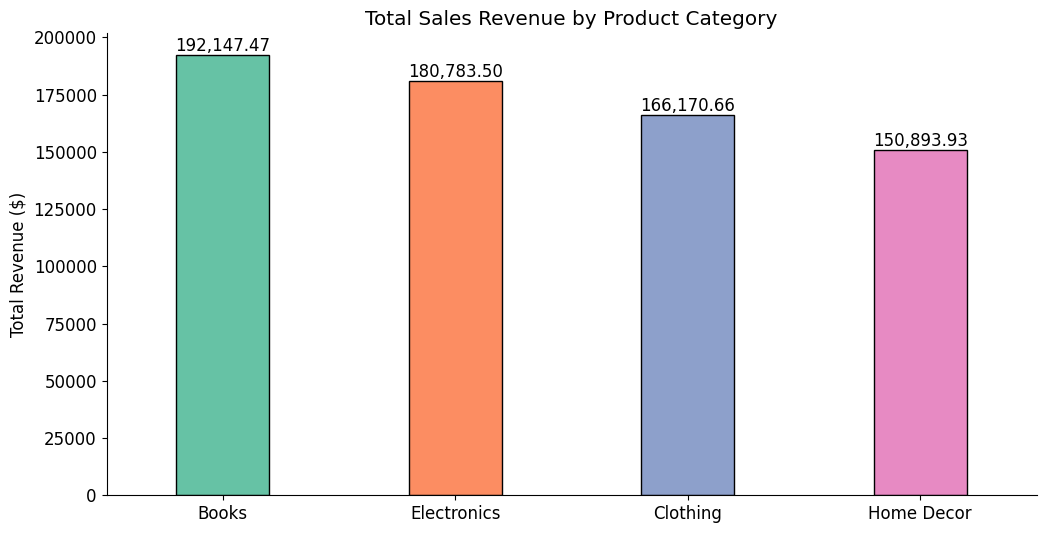

In [10]:
ax=sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="Set2", edgecolor='black', saturation=1, width=0.4)
sns.despine()

for container in ax.containers:
    ax.bar_label(container, fmt="{:,.2f}")

plt.title("Total Sales Revenue by Product Category")
ax.set_xlabel("")
ax.set_ylabel("Total Revenue ($)")

plt.show()

## Visualization 2: Top 10 customers by total spending


In [11]:
top_customers = merged_df.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_customers.head()

,TotalValue
CustomerName,
Paul Parsons,10673.87
Bruce Rhodes,8040.39
Gerald Hines,7663.70
William Adams,7634.45
Aimee Taylor,7572.91


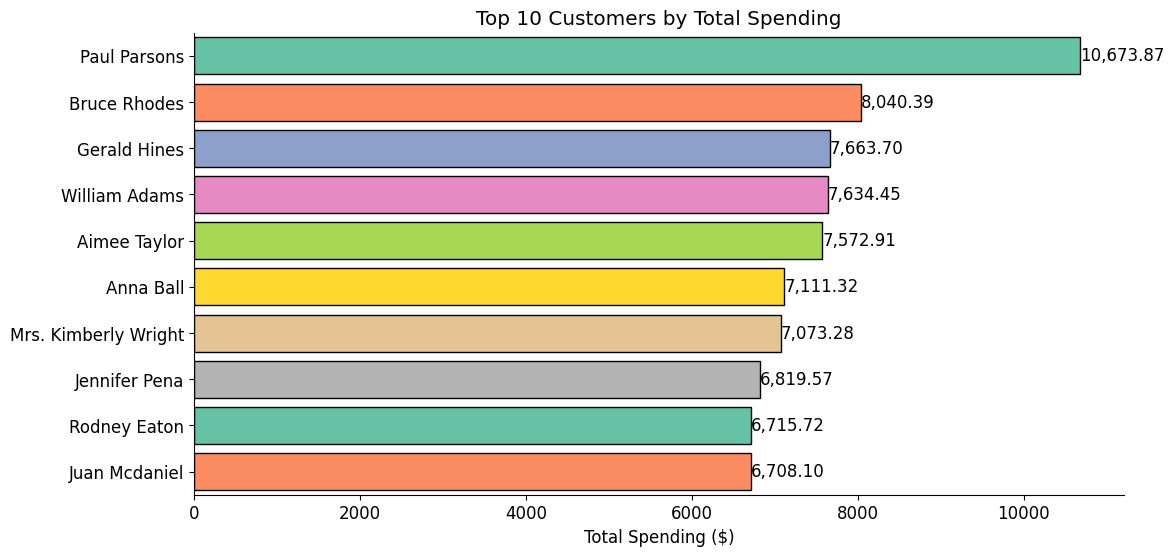

In [12]:
ax=sns.barplot(y=top_customers.index, x=top_customers.values, palette="Set2", edgecolor='black', saturation=1)
sns.despine()

for container in ax.containers:
    ax.bar_label(container, fmt="{:,.2f}")

plt.title("Top 10 Customers by Total Spending")
ax.set_xlabel("Total Spending ($)")
ax.set_ylabel("")
plt.show()

### Visualization 3: Number of transactions by region

In [13]:
transactions_by_region = merged_df["Region"].value_counts()
transactions_by_region.head()

,count
Region,
South America,304
North America,244
Europe,234
Asia,218


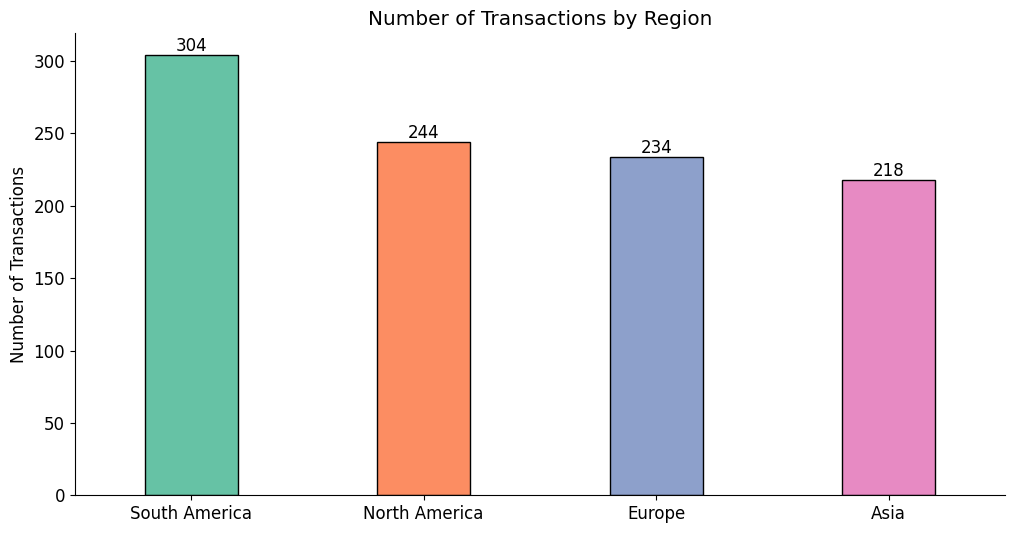

In [14]:
ax=sns.barplot(x=transactions_by_region.index, y=transactions_by_region.values, palette="Set2", edgecolor='black', saturation=1, width=0.4)
sns.despine()

for container in ax.containers:
    ax.bar_label(container)

plt.title("Number of Transactions by Region")
ax.set_xlabel("")
ax.set_ylabel("Number of Transactions")

plt.show()

### Visualization 4: Top 10 best-selling products by Quantity sold


In [15]:
top_products_by_quantity = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products_by_quantity.head(10)

,Quantity
ProductName,
ActiveWear Smartwatch,100
SoundWave Headphones,97
HomeSense Desk Lamp,81
ActiveWear Rug,79
SoundWave Cookbook,78
ActiveWear Jacket,76
BookWorld Biography,71
TechPro T-Shirt,66
SoundWave Desk Lamp,64


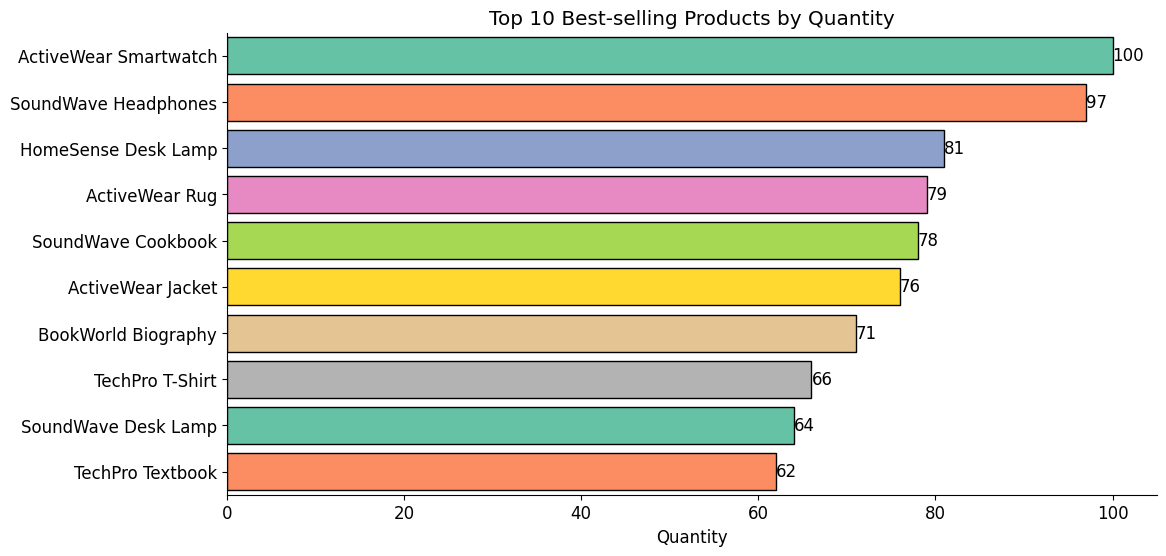

In [16]:
ax=sns.barplot(y=top_products_by_quantity.index, x=top_products_by_quantity.values, palette="Set2", edgecolor='black', saturation=1)
sns.despine()

for container in ax.containers:
    ax.bar_label(container)

plt.title("Top 10 Best-selling Products by Quantity")
ax.set_xlabel("Quantity")
ax.set_ylabel("")
plt.show()

## Visualization 5: Monthly sales trend

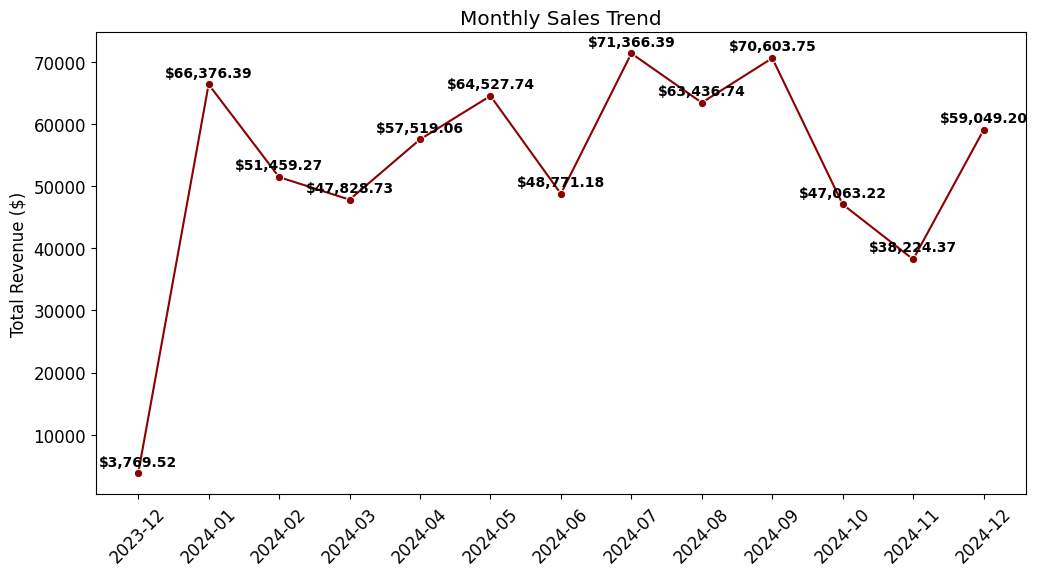

In [17]:
merged_df["TransactionMonth"] = merged_df["TransactionDate"].dt.to_period("M")
monthly_sales = merged_df.groupby("TransactionMonth")["TotalValue"].sum()

sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o", color="darkred")

plt.title("Monthly Sales Trend")
plt.xlabel("")
plt.ylabel("Total Revenue ($)")

for i, (x, y) in enumerate(zip(monthly_sales.index.astype(str), monthly_sales.values)):
    plt.text(x, y + 1250, f"${y:,.2f}", ha="center", fontsize=10, fontweight="bold")

plt.xticks(rotation=45)

plt.show()

## Visualization 6: Region-wise Revenue Distribution

In [18]:
region_revenue = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
region_revenue

,TotalValue
Region,
South America,219352.56
Europe,166254.63
North America,152313.40
Asia,152074.97


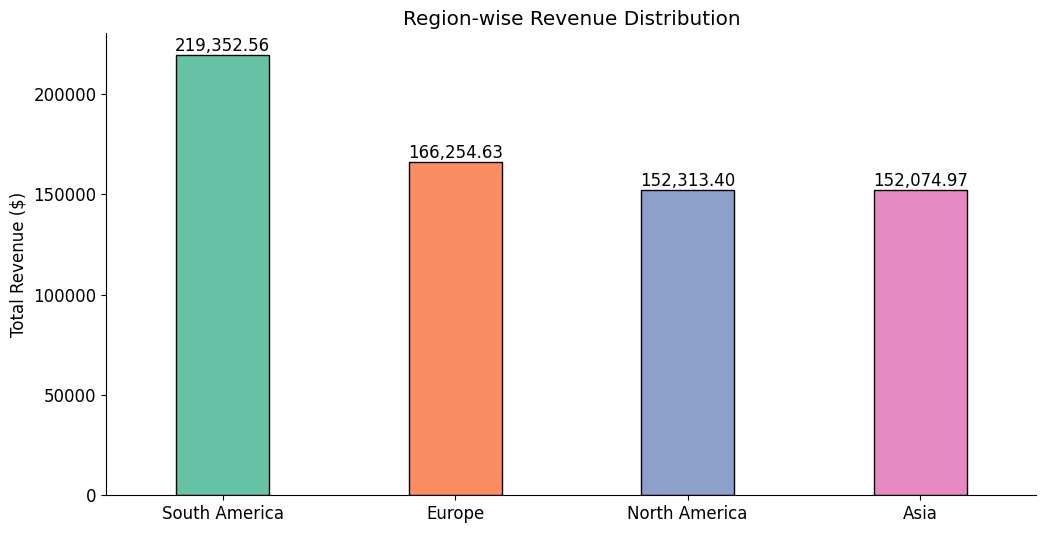

In [19]:
ax=sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="Set2", edgecolor='black', saturation=1, width=0.4)
sns.despine()

for container in ax.containers:
    ax.bar_label(container, fmt="{:,.2f}")

plt.title("Region-wise Revenue Distribution")
ax.set_xlabel("")
plt.ylabel("Total Revenue ($)")

plt.show()

## Average signup-to-first-purchase time

In [20]:
# Get the first transaction date per customer
first_purchase = merged_df.groupby("CustomerID")["TransactionDate"].min().reset_index()

# Merge with customer data to get signup date
customer_signup = customers_df[["CustomerID", "SignupDate"]]
signup_vs_first_purchase = first_purchase.merge(customer_signup, on="CustomerID")

# Compute time difference in days
signup_vs_first_purchase["DaysSinceSignup"] = (signup_vs_first_purchase["TransactionDate"] - signup_vs_first_purchase["SignupDate"]).dt.days

# Calculate average days to first purchase
avg_signup_to_purchase = signup_vs_first_purchase["DaysSinceSignup"].mean()
avg_signup_to_purchase

228.75879396984925